<a href="https://colab.research.google.com/github/vishnuvardhansai/ML-Projects/blob/main/Project_4_CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#supervised Learning
-->Regression Model

-->Linear or Lasso Regression Algorithm

In [ ]:
#Importing The dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
#Data Collection and Processing

In [ ]:
car_data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
car_data.shape

(4340, 8)

In [ ]:
car_data.isnull().sum() #No Missing Values in the Dataset

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
print(car_data['fuel'].value_counts())
print(car_data['seller_type'].value_counts())
print(car_data['transmission'].value_counts())
print(car_data['owner'].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [ ]:
#Machine Learning Model Cannot Understands The Data in the text form so
#we need to convert the Text type data into Numerical data

In [ ]:
#Encoding The Categorical data

In [ ]:
#Encoding The "Fuel" Column
car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace = True)

<ipython-input-116-5f92f1a59ab1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace = True)


In [ ]:
#Encoding The "Seller_type" Column
car_data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace = True)

<ipython-input-117-d5737ff25287>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace = True)


In [ ]:
#Encoding The "Transmission" Column
car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace = True)

<ipython-input-118-a98a74a6f899>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace = True)


In [ ]:
#Encoding The "owner" Column
car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace = True)

<ipython-input-119-13ad6e394e73>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace = True)


In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [ ]:
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0,1,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,0,0
4339,Renault KWID RXT,2016,225000,40000,0,1,0,0


Splitting The Data Into Training data and Test data

In [ ]:
x = car_data.drop(['name','selling_price'],axis=1)
y = car_data['selling_price']

In [ ]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [ ]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
print(x.shape,y.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4340, 6) (4340,) (3906, 6) (434, 6) (3906,) (434,)


Model Training

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Accuracy On Training Model

In [ ]:
X_train_accuracy_prediction = lin_model.predict(X_train)

In [ ]:
#R Squared Error
error_score = metrics.r2_score(Y_train,X_train_accuracy_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.42763612850186783


Visualize The actual Prices and Predicted prices

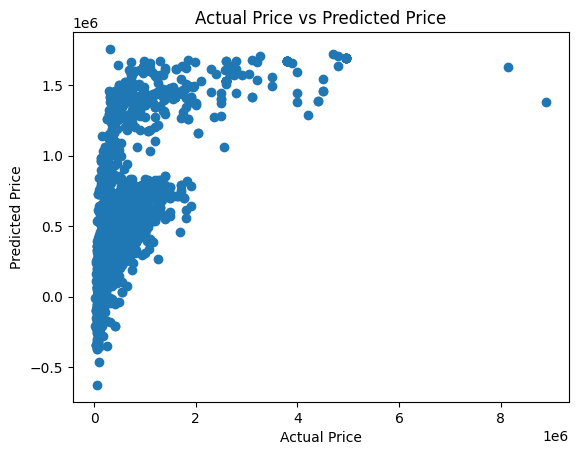

In [ ]:
plt.scatter(Y_train,X_train_accuracy_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Test Data Accuracy Prediction

In [ ]:
X_test_accuracy_prediction = lin_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,X_test_accuracy_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.5027999353753417


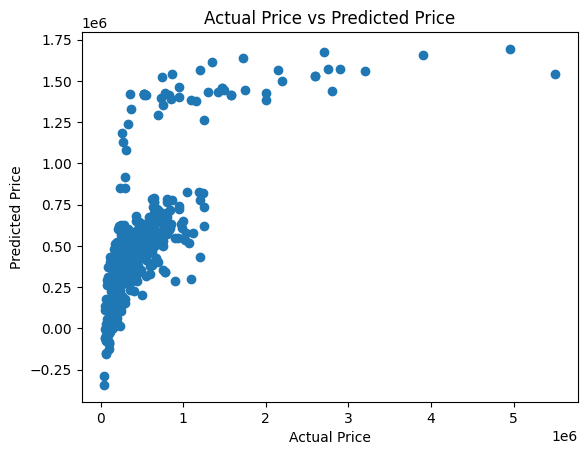

In [ ]:
plt.scatter(Y_test,X_test_accuracy_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Lasso Regression

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
#Accuracy On Training Model

In [ ]:
X_train_accuracy_prediction = lasso_model.predict(X_train)

In [ ]:
#R Squared Error
error_score = metrics.r2_score(Y_train,X_train_accuracy_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.42763612844686605


Visualize The actual Prices and Predicted prices

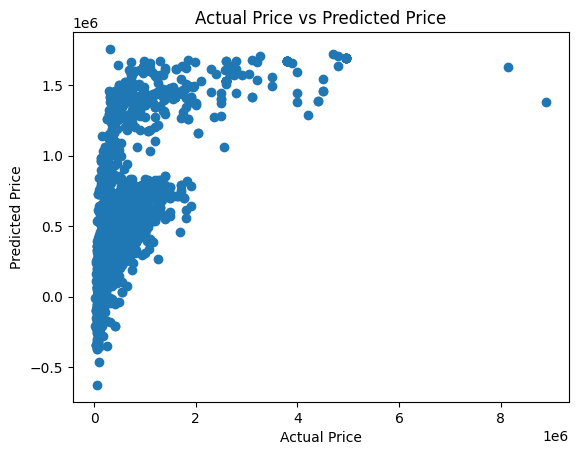

In [ ]:
plt.scatter(Y_train,X_train_accuracy_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Test Data Accuracy Prediction

In [ ]:
X_test_accuracy_prediction = lasso_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,X_test_accuracy_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.5027994839428178


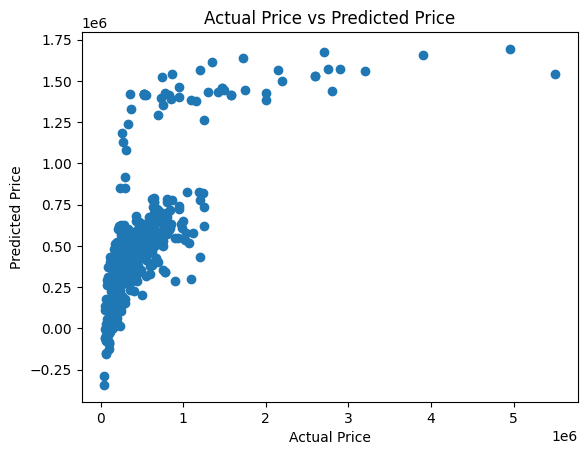

In [ ]:
plt.scatter(Y_test,X_test_accuracy_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()